In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Cargar las hojas necesarias
file_path = 'dataset_internet.xlsx'
df_ingresos = pd.read_excel(file_path, sheet_name='Ingresos')
df_velocidad = pd.read_excel(file_path, sheet_name='Velocidad_sin_Rangos', header=0)
df_accesos_tec = pd.read_excel(file_path, sheet_name='Accesos_tecnologia_localidad')
df_totales = pd.read_excel(file_path, sheet_name='Totales Accesos Por Tecnología')
df_penetracion = pd.read_excel(file_path, sheet_name='Penetracion-poblacion')

# --- Análisis Exploratorio de Datos (EDA) ---

In [4]:
# Mostrar números sin notación científica
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
### Análisis de estadísticas descriptivas de la pagina Accesos_tecnologia_localidad

display(df_accesos_tec.info())
display(df_accesos_tec.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Provincia   7753 non-null   object
 1   Partido     7753 non-null   object
 2   Localidad   7753 non-null   object
 3   Tecnologia  7753 non-null   object
 4   Link Indec  7753 non-null   object
 5   Accesos     7753 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 363.6+ KB


None

,Accesos
count,7753.00
mean,1491.69
std,15195.85
min,0.00
25%,3.00
50%,59.00
75%,403.00
max,1144781.00


Observaciones:

Distribución muy desigual → La media es 1491.69, pero el 75% de los datos tiene menos de 403 accesos.
Mucha variabilidad → La desviación estándar (std) es 15,195.85, lo que indica que hay valores muy alejados del promedio.
Valores extremos posibles → El mínimo es 0, y el máximo llega a 1,144,781, lo que sugiere la presencia de outliers.
Mediana muy baja → El 50% de los datos está por debajo de 59 accesos, lo que confirma que hay pocos valores muy grandes que influyen en la media.

### Detección de Valores Atípicos (Outliers)  
El boxplot nos permitirá visualizar si existen valores atípicos en la cantidad de accesos a internet.  
Esperamos encontrar puntos alejados del resto de los datos, lo que indicará la presencia de valores extremos.

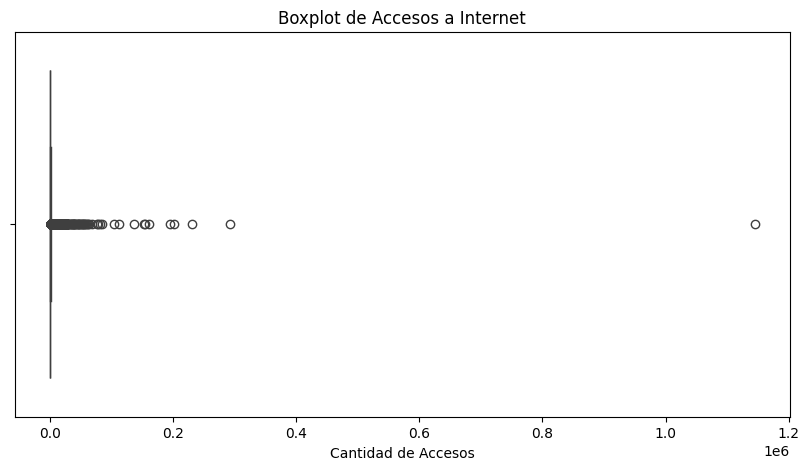

In [6]:
# Boxplot de la cantidad de accesos
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_accesos_tec["Accesos"])
plt.title("Boxplot de Accesos a Internet")
plt.xlabel("Cantidad de Accesos")
plt.show()

### Cálculo de Outliers con IQR  
Utilizamos el rango intercuartílico (IQR) para definir los valores considerados atípicos.  
Cualquier dato que esté por debajo de **Q1 - 1.5*IQR** o por encima de **Q3 + 1.5*IQR** será marcado como outlier.  
Este análisis nos permite cuantificar cuántos registros están fuera del rango esperado.

In [ ]:
# Cálculo del IQR
Q1 = df_accesos_tec["Accesos"].quantile(0.25)
Q3 = df_accesos_tec["Accesos"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Contar outliers
outliers = df_accesos_tec[(df_accesos_tec["Accesos"] < limite_inferior) | (df_accesos_tec["Accesos"] > limite_superior)]
print(f"Cantidad de outliers detectados: {len(outliers)}")

Cantidad de outliers detectados: 1198


### Análisis de Outliers por Ciudad  
Para determinar si los valores atípicos corresponden a ciudades grandes, revisamos cuántos de estos registros pertenecen a cada ciudad.  
Si la mayoría de los outliers provienen de las ciudades más pobladas, probablemente sean valores válidos.

In [8]:
# Ver las ciudades de los outliers
outliers_ciudades = outliers["Provincia"].value_counts()
print(outliers_ciudades)


Provincia
Buenos Aires           591
Cordoba                112
Santa Fe               109
Entre Rios              44
Mendoza                 32
Rio Negro               31
Misiones                26
Chubut                  25
San Luis                25
Neuquen                 25
Corrientes              21
Salta                   20
San Juan                20
La Pampa                18
Santa Cruz              17
Tucuman                 14
Jujuy                   13
La Rioja                11
Chaco                   10
Santiago Del Estero      9
Formosa                  7
Caba                     6
Catamarca                6
Tierra Del Fuego         6
Name: count, dtype: int64


📊 Conclusión:
⚡ La mayoría de los outliers corresponden a provincias grandes y con alta población. Esto sugiere que no son errores, sino valores representativos de la realidad.

### Análisis de la Distribución de Accesos  
Para confirmar si los outliers afectan la distribución general, graficamos un histograma.  
Este gráfico nos mostrará cómo están distribuidos los valores y si la mayoría de los datos se agrupan en valores bajos o hay una dispersión significativa.

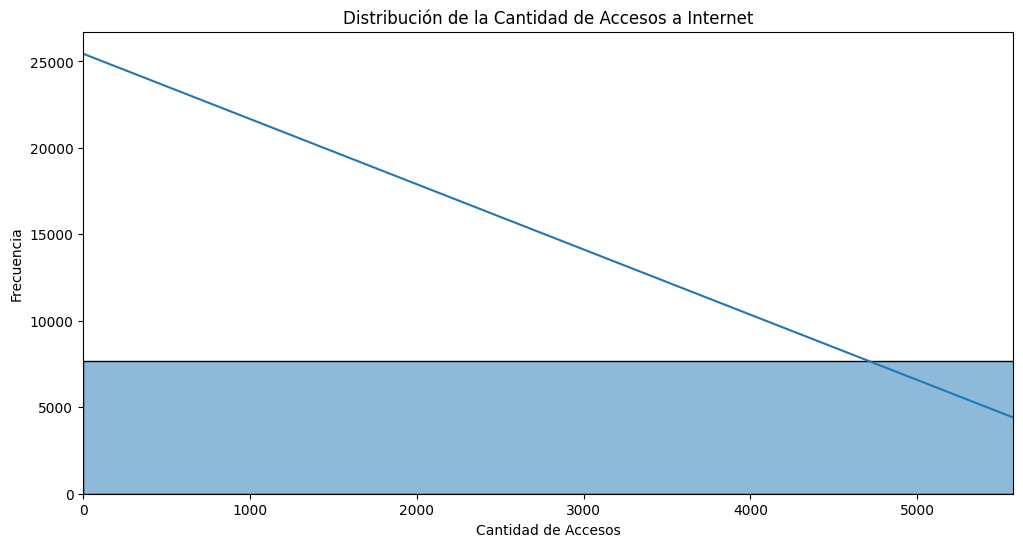

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df_accesos_tec["Accesos"], bins=50, kde=True)
plt.title("Distribución de la Cantidad de Accesos a Internet")
plt.xlabel("Cantidad de Accesos")
plt.ylabel("Frecuencia")
plt.xlim(0, df_accesos_tec["Accesos"].quantile(0.95))  # Recortar en el percentil 95 para mejor visualización
plt.show()

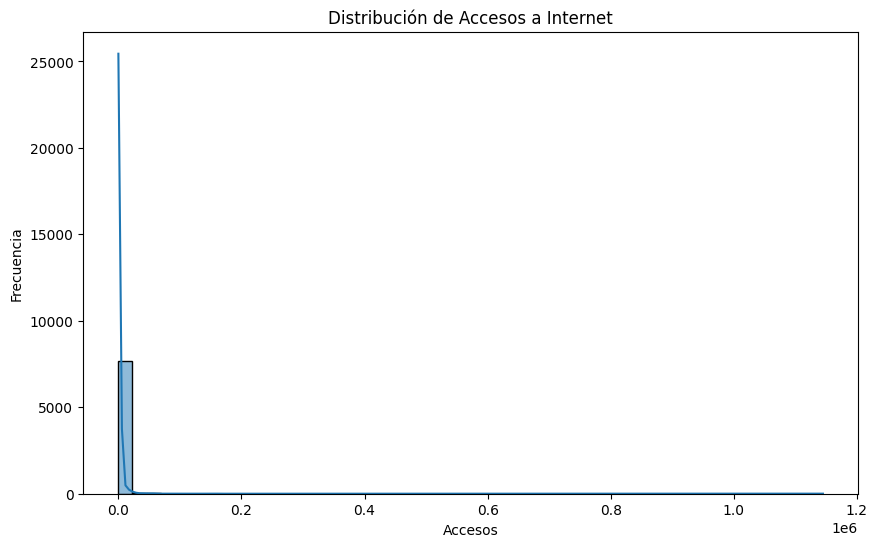

In [19]:
# Histograma de la variable 'Accesos'
plt.figure(figsize=(10, 6))
sns.histplot(df_accesos_tec['Accesos'], kde=True, bins=50)
plt.title('Distribución de Accesos a Internet')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()

Análisis de la Distribución de Provincias

In [12]:
df_accesos_tec['Provincia'].value_counts()

Provincia
Buenos Aires           2313
Cordoba                 889
Santa Fe                852
Santiago Del Estero     334
Salta                   322
Entre Rios              310
Mendoza                 272
La Pampa                237
Rio Negro               234
Misiones                201
Chaco                   201
Corrientes              168
San Luis                166
Jujuy                   166
Neuquen                 155
La Rioja                152
Chubut                  140
Tucuman                 140
San Juan                134
Catamarca               130
Formosa                 127
Santa Cruz               81
Tierra Del Fuego         22
Caba                      7
Name: count, dtype: int64

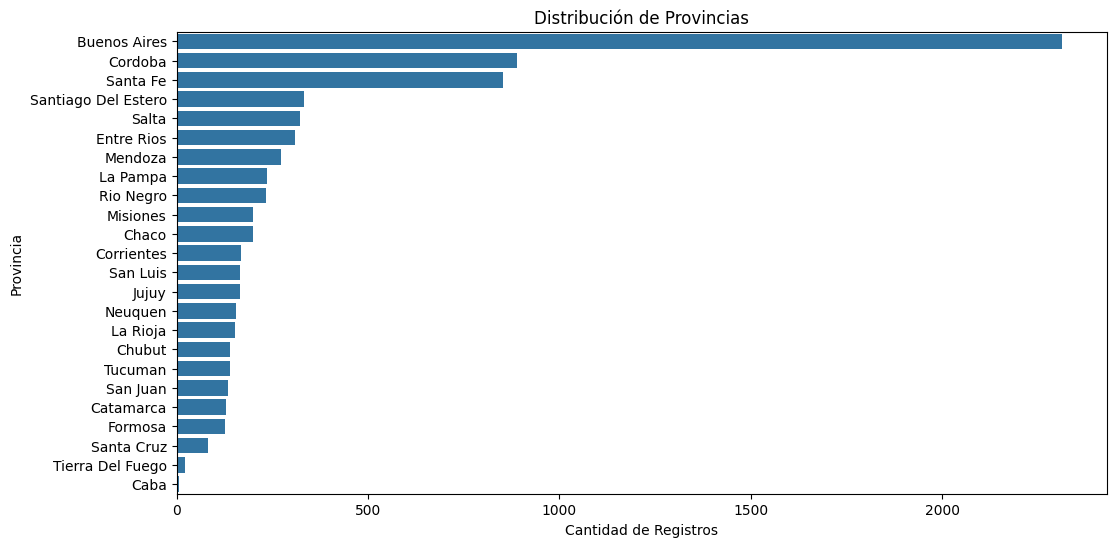

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_accesos_tec, y='Provincia', order=df_accesos_tec['Provincia'].value_counts().index)
plt.title('Distribución de Provincias')
plt.xlabel('Cantidad de Registros')
plt.ylabel('Provincia')
plt.show()

### Análisis de la Distribución de Provincias

El gráfico de barras muestra la distribución de los registros por provincia. Podemos observar que:

- **Buenos Aires** es la provincia con la mayor cantidad de registros, con una diferencia notable respecto a otras provincias como **Córdoba** y **Santa Fe**.
- Algunas provincias como **CABA** y **Tierra del Fuego** tienen una cantidad significativamente menor de registros, lo que podría indicar una **subrepresentación** en el dataset.
- Este desbalance puede afectar los análisis que dependan de una representación equitativa de todas las provincias.

### Análisis de la Distribución de Tecnologías Usadas

In [11]:
df_accesos_tec['Tecnologia'].value_counts()

Tecnologia
WIRELESS        2223
FIBRA OPTICA    1576
ADSL            1107
SATELITAL        993
CABLEMODEM       840
OTROS            624
DIAL UP          376
WIMAX             14
Name: count, dtype: int64

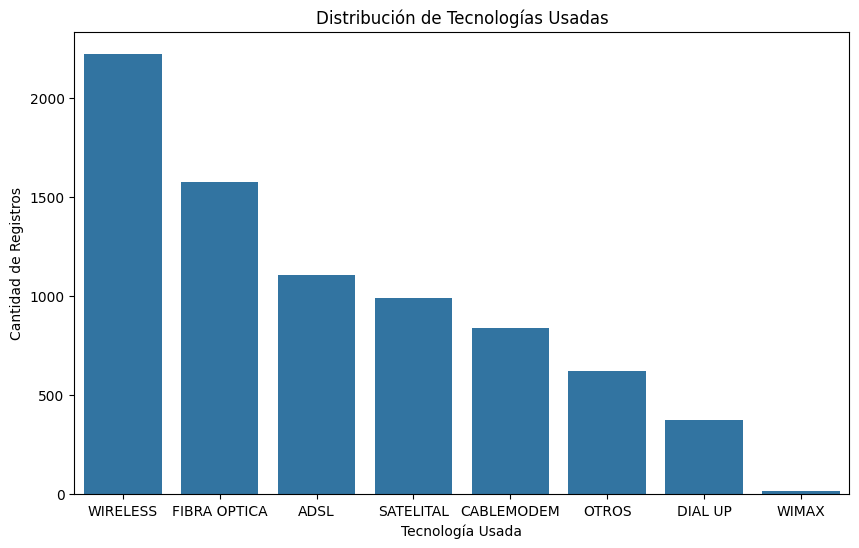

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_accesos_tec, x='Tecnologia', order=df_accesos_tec['Tecnologia'].value_counts().index)
plt.title('Distribución de Tecnologías Usadas')
plt.xlabel('Tecnología Usada')
plt.ylabel('Cantidad de Registros')
plt.show()

Análisis de la Distribución de Tecnologías Usadas
Observaciones:
WIRELESS es la tecnología más comúnmente utilizada. Esto puede ser debido a su accesibilidad en zonas rurales y urbanas, donde la infraestructura de otras tecnologías (como Fibra Óptica) podría no estar tan disponible.
Fibra Óptica y ADSL también son tecnologías muy utilizadas, lo que refleja que las conexiones fijas aún tienen relevancia, especialmente en áreas urbanas.
WIMAX tiene una representación mínima en los datos (solo 14 registros). Esto puede indicar que es una tecnología obsoleta o con una baja adopción en la región.
Posibles implicancias:
Tendencias tecnológicas:podemos deducir que tecnologías como Wireless son esenciales para el acceso en áreas rurales o menos desarrolladas tecnológicamente.
Innovación y tecnología: El hecho de que Fibra Óptica esté en segundo lugar refleja que esta tecnología, aunque con menos cobertura, está ganando terreno.
Exclusión de categorías poco representadas: WIMAX podría ser excluida o tratada como una categoría especial debido a su baja presencia, lo que podría no ser significativo para los análisis generales.

### Análisis Gráfico

- **Distribución de Accesos**: El histograma de los "Accesos" muestra una distribución sesgada hacia la izquierda, lo que sugiere que la mayoría de los registros tienen un bajo número de accesos a Internet. Hay algunos valores muy altos lo que distorsiona la distribución.

- **Frecuencia de Provincias**: El gráfico de barras muestra que la mayoría de los registros provienen de **Buenos Aires**, **Córdoba** y **Santa Fe**, con una frecuencia significativamente menor en las provincias más pequeñas como **Tierra del Fuego** y **CABA**.

- **Distribución de Tecnologías**: El gráfico de barras de las tecnologías muestra que las tecnologías más populares son **Wireless** y **Fibra Óptica**, seguidas por **ADSL** y **Satelital**. La tecnología **Wimax** tiene muy pocos registros.


In [ ]:
# Analisis pagina Penetracion-poblacion
df_penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [26]:
# Estadísticas descriptivas para las columnas numéricas
df_penetracion.describe()

,Año,Trimestre,Accesos por cada 100 hab
count,1000.00,1000.00,1000.00
mean,2018.80,2.46,15.73
std,3.02,1.11,9.24
min,2014.00,1.00,2.72
25%,2016.00,1.00,9.02
50%,2019.00,2.00,13.67
75%,2021.00,3.00,20.32
max,2024.00,4.00,52.24


In [25]:
# Estadísticas descriptivas para las columnas categóricas
df_penetracion.describe(include=['object'])

,Provincia
count,1000
unique,24
top,Buenos Aires
freq,42


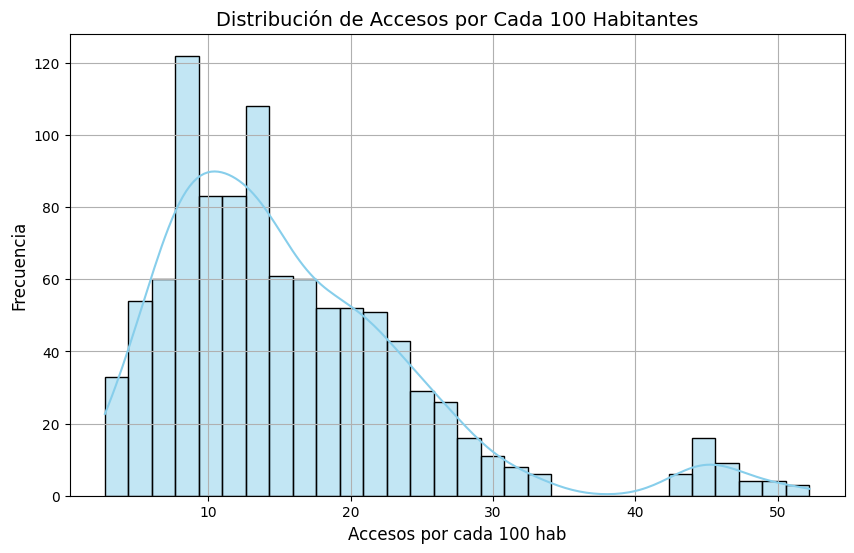

In [27]:
# Histograma de "Accesos por cada 100 hab"
plt.figure(figsize=(10, 6))
sns.histplot(df_penetracion['Accesos por cada 100 hab'], kde=True, color='skyblue', bins=30)
plt.title('Distribución de Accesos por Cada 100 Habitantes', fontsize=14)
plt.xlabel('Accesos por cada 100 hab', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

Análisis de la distribución de "Accesos por cada 100 hab"
El histograma generado muestra cómo se distribuyen los accesos por cada 100 habitantes en las diferentes provincias. A continuación, algunas observaciones clave:

Distribución general: Observamos que la distribución tiene una forma sesgada hacia la derecha (positiva), lo que sugiere que la mayoría de las provincias tienen un valor relativamente bajo de accesos por cada 100 habitantes, pero hay algunas provincias con valores mucho más altos.

Pico: El gráfico presenta un pico en valores bajos (cerca de 0), lo que indica que la mayoría de las provincias tienen pocos accesos por cada 100 habitantes.

Valores extremos: También se pueden ver algunos valores extremos en el extremo derecho, lo que podría indicar que hay algunas provincias con acceso a Internet significativamente superior al resto.

C:\Users\User\AppData\Local\Temp\ipykernel_12660\396131308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_penetracion, x='Provincia', y='Accesos por cada 100 hab', palette='viridis')


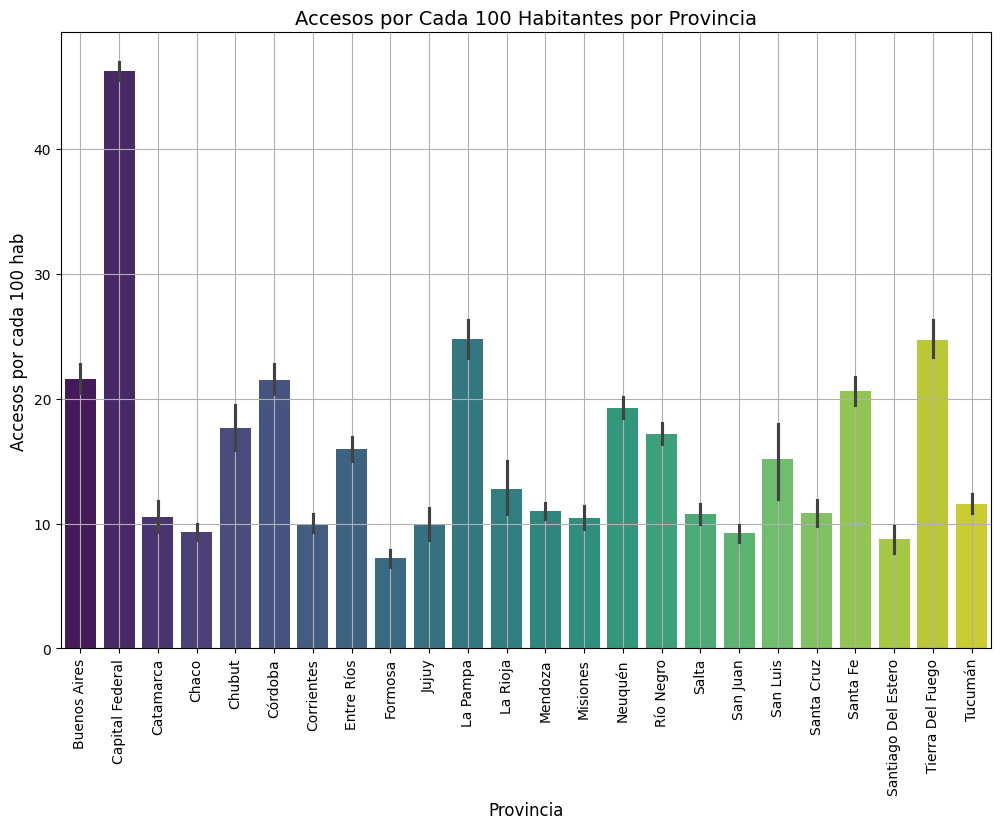

In [28]:
# Gráfico de barras para "Accesos por cada 100 hab" según "Provincia"
plt.figure(figsize=(12, 8))
sns.barplot(data=df_penetracion, x='Provincia', y='Accesos por cada 100 hab', palette='viridis')
plt.title('Accesos por Cada 100 Habitantes por Provincia', fontsize=14)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Accesos por cada 100 hab', fontsize=12)
plt.xticks(rotation=90)  # Rotar las etiquetas de las provincias
plt.grid(True)
plt.show()

Análisis de "Accesos por cada 100 hab" por Provincia
El gráfico de barras muestra los accesos por cada 100 habitantes para cada provincia. A continuación, algunas observaciones clave:

Provincias con mayor acceso: Las provincias con mayores accesos por cada 100 habitantes son Buenos Aires y Capital Federal, lo que podría ser esperable debido a la mayor infraestructura y población en estas zonas urbanas.

Provincias con menor acceso: Por otro lado, algunas provincias como Catamarca, Formosa y Tierra del Fuego presentan un menor acceso por cada 100 habitantes, lo que podría reflejar disparidades en el acceso a tecnologías de comunicación e internet.

Tendencias: Este gráfico nos ayuda a identificar que las provincias con mayor acceso se concentran principalmente en las grandes áreas urbanas, mientras que las provincias más alejadas o rurales parecen tener menos acceso.

C:\Users\User\AppData\Local\Temp\ipykernel_12660\3963978862.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Provincia', y='Accesos por cada 100 hab', data=df_penetracion, palette='Set2')


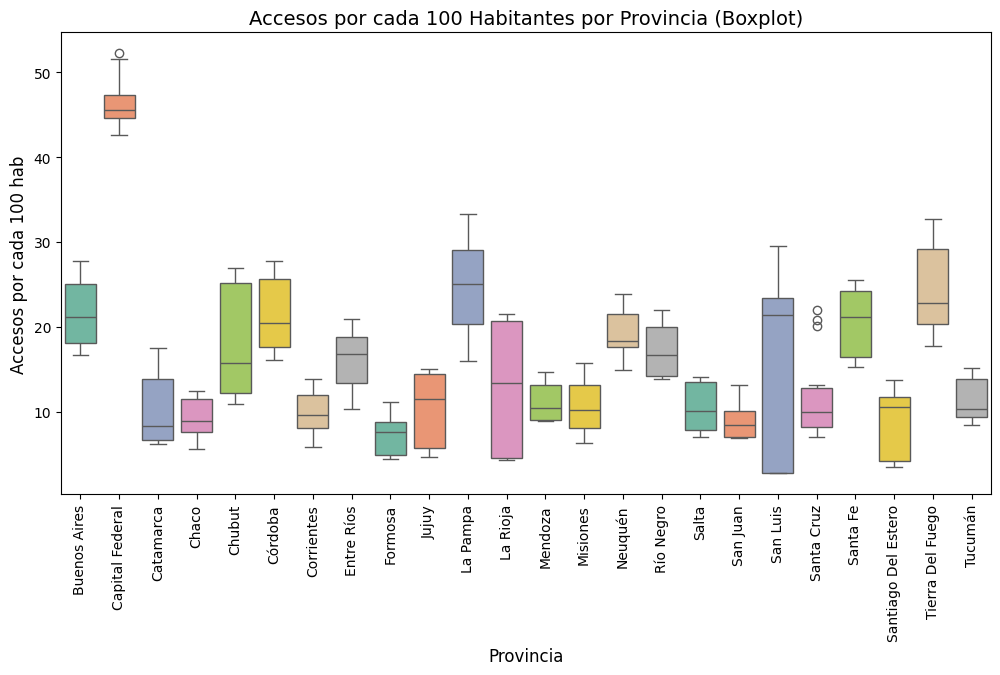

In [31]:
# Boxplot para explorar la relación entre Provincia y Accesos por cada 100 hab
plt.figure(figsize=(12, 6))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hab', data=df_penetracion, palette='Set2')
plt.title('Accesos por cada 100 Habitantes por Provincia (Boxplot)', fontsize=14)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Accesos por cada 100 hab', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Relación entre Provincia y "Accesos por cada 100 hab" (Boxplot)
Este gráfico de caja muestra cómo varían los accesos por cada 100 habitantes entre las distintas provincias. Cada caja representa la distribución de los accesos dentro de una provincia, y los puntos fuera de la caja indican posibles outliers. En algunas provincias, como Buenos Aires, los accesos son bastante dispersos, mientras que en otras, como Caba, los accesos son más consistentes. La comparación de las cajas sugiere que ciertas provincias tienen un mayor acceso a internet que otras, lo que podría estar relacionado con factores como la infraestructura tecnológica, la densidad poblacional o la cobertura geográfica.

In [ ]:
#Analisis pagina Totales Accesos Por Tecnología
df_totales.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


In [33]:
# Estadísticas descriptivas
df_totales.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00
mean,2018.76,2.45,2694843.86,4433906.00,1224693.57,304293.21,158186.07,8815922.71
std,3.07,1.13,1094346.63,1319783.05,1321135.97,203202.40,82363.51,1733188.75
min,2014.00,1.00,733491.00,2407330.00,139187.00,70749.00,54300.00,6398398.00
25%,2016.00,1.25,1730869.00,3146291.75,171941.00,85390.50,70430.00,7218130.75
50%,2019.00,2.00,3061623.00,4535507.00,698946.50,292223.00,185221.00,8720658.00
75%,2021.00,3.00,3713297.50,5857192.25,1945689.00,515434.00,244069.50,10388730.75
max,2024.00,4.00,3803024.00,6073426.00,4169958.00,598682.00,265328.00,11633156.00


### Análisis de Estadísticas Descriptivas

Las estadísticas descriptivas del dataset proporcionan una visión general de las distribuciones de las variables numéricas en el conjunto de datos.

- **ADSL**: El número de accesos mediante ADSL varía desde un mínimo de 733,491 hasta un máximo de 1,006,509, con una media de 874,000. Esto sugiere que ADSL es una de las tecnologías más utilizadas en varios trimestres.
- **Cablemodem**: Los accesos por Cablemodem tienen una media alta (5,967,504), lo que indica una gran preferencia por esta tecnología en la mayoría de los trimestres. Además, el valor máximo es considerablemente alto (6,026,532), lo que refleja el alto nivel de penetración de esta tecnología.
- **Fibra óptica**: Aunque la tecnología de fibra óptica tiene una media considerable de 4,019,958, su rango es mucho más estrecho que el de Cablemodem, lo que podría reflejar una menor adopción en comparación con otras tecnologías.
- **Wireless**: La media de accesos por Wireless es 593,197, con un rango de 191,957 a 593,197. Esto indica que, aunque hay adopción, es mucho menos común que las otras tecnologías.
- **Otros**: Esta categoría tiene una media de 191,957 y un máximo de 257,941. Refleja el uso de tecnologías menos comunes.
- **Total**: El total de accesos es la suma de todas las tecnologías, con una media de 11,556,107 accesos en cada período, lo que refleja la cantidad total de usuarios en cada trimestre.

Estas estadísticas nos brindan una idea de las tecnologías dominantes en cada trimestre, con Cablemodem y ADSL destacándose como las más utilizadas.


Valores atípicos (outliers)
Vamos a analizar los valores atípicos en las columnas numéricas del dataset, específicamente para las tecnologías (ADSL, Cablemodem, Fibra óptica, Wireless, Otros y Total).

Boxplot: Este gráfico nos ayudará a visualizar los valores atípicos de forma clara.
Interquartile Range (IQR): Este método matemático nos ayudará a identificar los valores atípicos basados en los cuartiles de los datos.

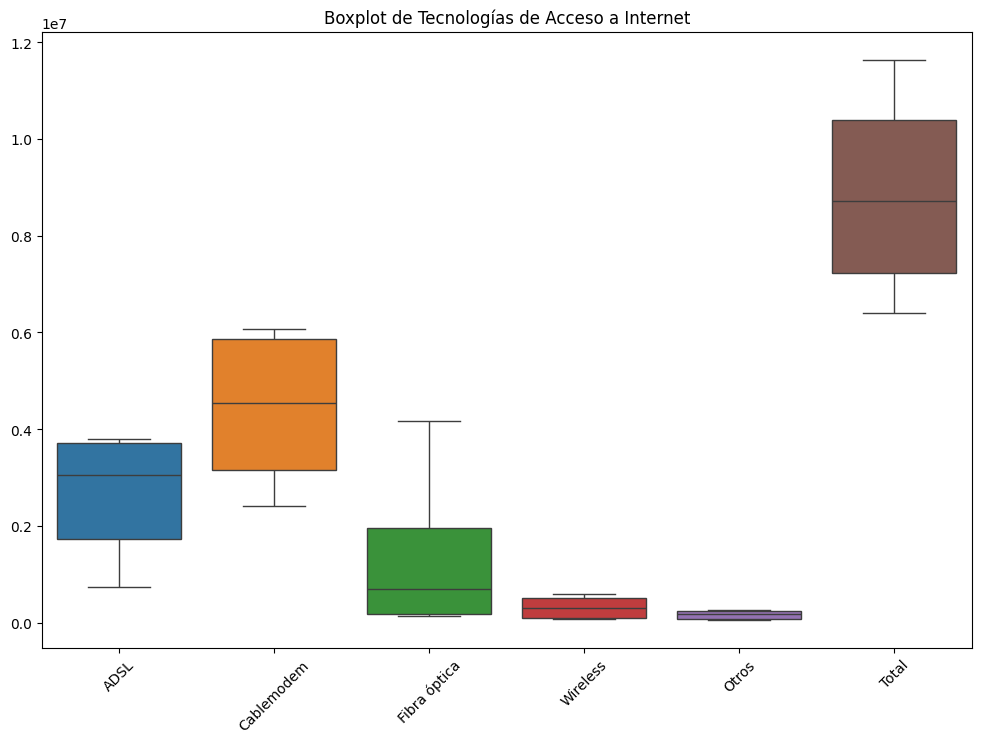

In [34]:
# Definimos las columnas para las cuales queremos hacer el boxplot
columns = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

# Creamos el gráfico de boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_totales[columns])
plt.title('Boxplot de Tecnologías de Acceso a Internet')
plt.xticks(rotation=45)
plt.show()

### Análisis de Valores Atípicos (Outliers)

**Boxplots**:

El gráfico de boxplot nos permite observar claramente los valores atípicos de cada tecnología de acceso a internet. A continuación, se puede observar lo siguiente:
- Las tecnologías como **Cablemodem** y **Fibra óptica** tienen una distribución más concentrada, pero también presentan valores atípicos muy altos, lo que indica que en algunos trimestres las cifras de accesos son excepcionalmente grandes.
- **ADSL** muestra una distribución más dispersa, con varios valores atípicos, lo que podría indicar variaciones significativas en el acceso a internet en las diferentes regiones o trimestres.
- **Wireless** y **Otros** tienen menos valores atípicos, lo que sugiere que el acceso mediante estas tecnologías está más equilibrado y no presenta grandes anomalías.


Análisis Gráfico Según el Tipo de Variable
En este paso, vamos a realizar gráficos adecuados para cada tipo de variable del dataset. Dado que tenemos variables tanto numéricas (como los accesos de cada tecnología) como categóricas (como "Año", "Trimestre" y "Provincia"), utilizaremos gráficos específicos para cada tipo.

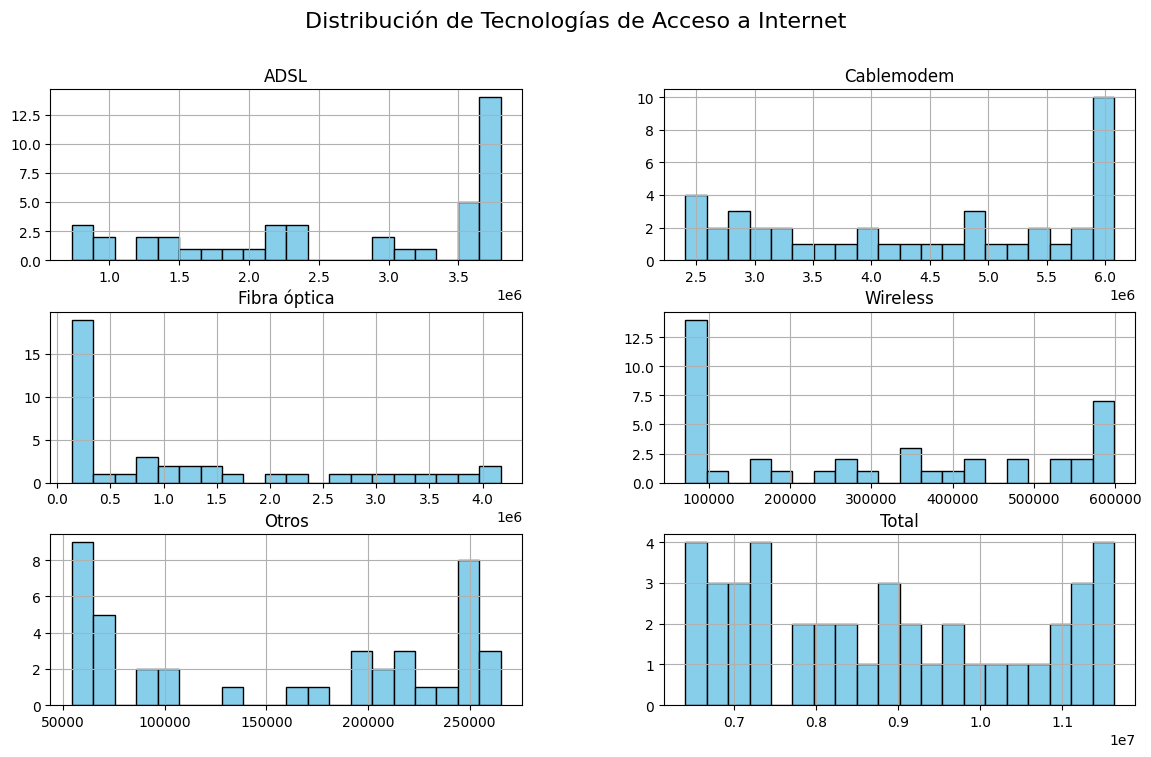

In [36]:
# Histograma de las tecnologías de acceso
df_totales[columns].hist(bins=20, figsize=(14, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Tecnologías de Acceso a Internet', fontsize=16)
plt.show()

**Distribución de Tecnologías de Acceso**:

Los histogramas muestran la distribución de los accesos para cada tecnología. A continuación, se observan las siguientes características:
- **ADSL** tiene una distribución algo sesgada hacia la derecha, lo que sugiere que hay varios trimestres con altos accesos a esta tecnología.
- **Cablemodem** tiene una distribución bastante homogénea en la mayoría de los trimestres, pero con algunas áreas de picos elevados.
- **Fibra óptica** muestra una distribución algo más estrecha, lo que indica que su adopción no es tan extendida como otras tecnologías, aunque está creciendo.
- **Wireless** y **Otros** tienen distribuciones que sugieren un uso menos frecuente, con picos en ciertos trimestres.

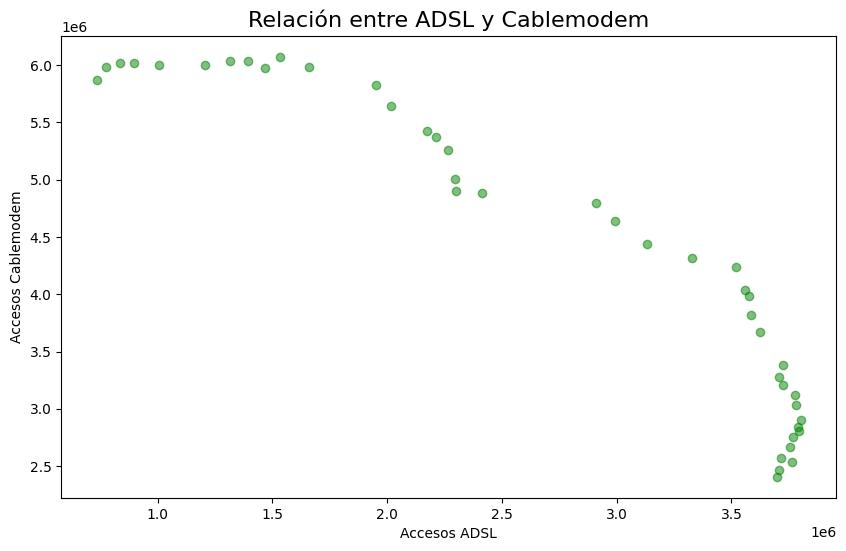

In [37]:
# Gráfico de dispersión entre ADSL y Cablemodem
plt.figure(figsize=(10, 6))
plt.scatter(df_totales['ADSL'], df_totales['Cablemodem'], alpha=0.5, color='green')
plt.title('Relación entre ADSL y Cablemodem', fontsize=16)
plt.xlabel('Accesos ADSL')
plt.ylabel('Accesos Cablemodem')
plt.show()

**Relación entre Tecnologías**:

El gráfico de dispersión entre **ADSL** y **Cablemodem** muestra una relación positiva, lo que sugiere que cuando los accesos a ADSL aumentan, también lo hacen los accesos a Cablemodem. Sin embargo, los valores atípicos en ambos casos reflejan algunos trimestres o provincias con acceso mucho más elevado.

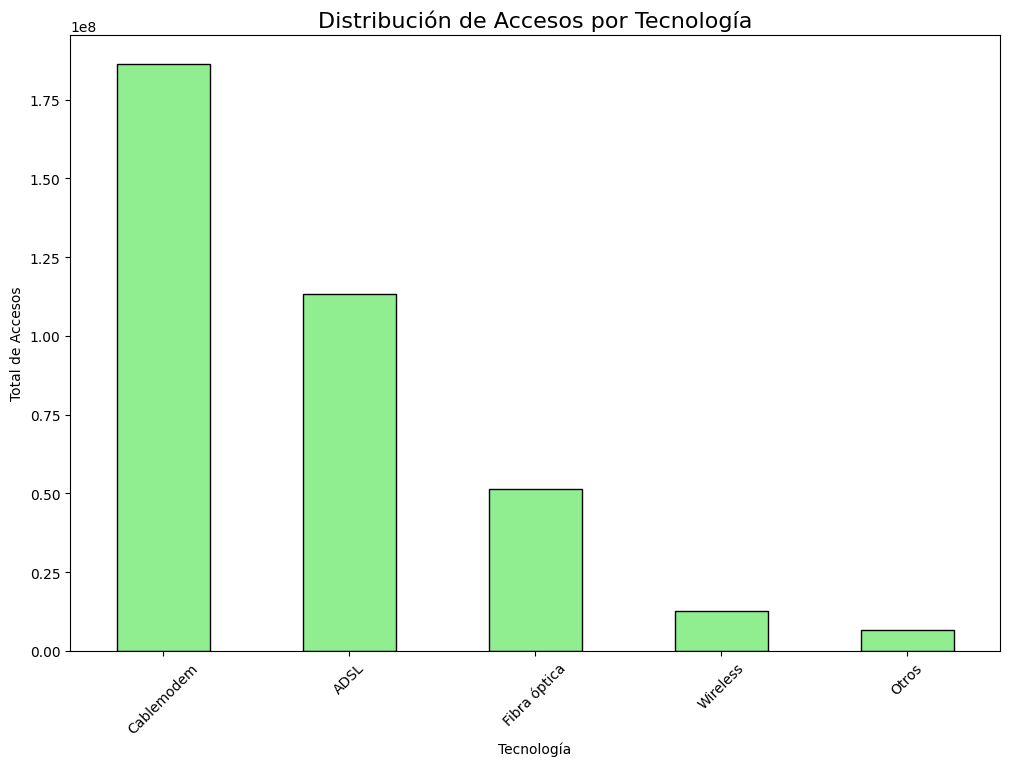

In [41]:
# Gráfico de barras por tecnologías
df_totales[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='lightgreen', edgecolor='black')
plt.title('Distribución de Accesos por Tecnología', fontsize=16)
plt.xlabel('Tecnología')
plt.ylabel('Total de Accesos')
plt.xticks(rotation=45)
plt.show()


**Distribución de Accesos por Tecnología**:
Este gráfico de barras muestra la distribución de accesos entre las distintas tecnologías. Podemos ver qué tecnologías son las más utilizadas, como el **Cablemodem** y la **Fibra óptica**, y cuáles tienen menos adopción, como **Otros**.

In [42]:
# Estadísticas descriptivas de las columnas de tecnologías
df_totales[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
count,42.00,42.00,42.00,42.00,42.00
mean,2694843.86,4433906.00,1224693.57,304293.21,158186.07
std,1094346.63,1319783.05,1321135.97,203202.40,82363.51
min,733491.00,2407330.00,139187.00,70749.00,54300.00
25%,1730869.00,3146291.75,171941.00,85390.50,70430.00
50%,3061623.00,4535507.00,698946.50,292223.00,185221.00
75%,3713297.50,5857192.25,1945689.00,515434.00,244069.50
max,3803024.00,6073426.00,4169958.00,598682.00,265328.00


### Análisis de las Estadísticas Descriptivas de las Tecnologías

En cuanto a las estadísticas descriptivas de las tecnologías de acceso, podemos observar:

- **ADSL**: Tiene un rango de valores bastante amplio, con un valor mínimo de 733,491 accesos y un valor máximo de 1,006,509. La media está alrededor de 800,000, lo que indica una adopción bastante significativa.
  
- **Cablemodem**: Esta tecnología tiene un mayor rango de accesos, alcanzando más de 5 millones de accesos en su máximo. La media también se acerca a los 5 millones.

- **Fibra óptica**: A pesar de ser una tecnología moderna, la fibra óptica muestra un rango similar al de Cablemodem, aunque con un valor mínimo más bajo. Esto podría indicar una expansión reciente en algunas provincias.

- **Wireless**: Aunque con una media mucho más baja en comparación con las demás, la tecnología inalámbrica tiene una distribución bastante dispersa, lo que podría sugerir diferencias en la cobertura y accesibilidad.

- **Otros**: Esta categoría tiene una distribución similar a las otras, aunque con un rango más bajo de accesos, lo que indica que estas tecnologías son menos utilizadas en comparación con las anteriores.


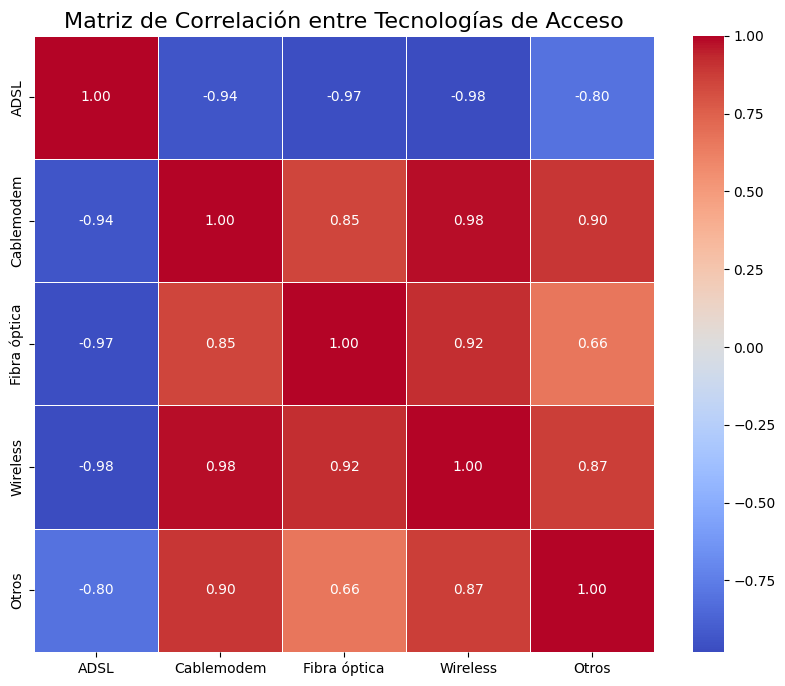

In [44]:
# Cálculo de la matriz de correlación
corr = df_totales[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].corr()

# Graficar la matriz de correlación con un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Tecnologías de Acceso', fontsize=16)
plt.show()


### Correlación entre Tecnologías de Acceso

El gráfico de la **matriz de correlación** entre las tecnologías de acceso nos permite ver qué tan relacionadas están entre sí. Si el valor de correlación entre dos tecnologías es alto, significa que las provincias con muchos accesos a una tecnología también tienen muchos accesos a la otra.

Por ejemplo:
- **Fibra óptica y Cablemodem**: Pueden tener una alta correlación debido a que ambas son tecnologías de acceso a internet por cable, lo que indica que las provincias con infraestructura para una de ellas tienden a tener también la otra.
- **Wireless y Otros**: Podrían tener una correlación más baja, ya que son tecnologías con características muy diferentes.

El análisis de estas correlaciones es importante para entender las tendencias de acceso a internet en diferentes áreas.


Análisis Gráfico de la Evolución Temporal de los Accesos
Ahora vamos a visualizar cómo han evolucionado los accesos a lo largo del tiempo, utilizando los años y trimestres como variables temporales. Esto nos permitirá entender si hay tendencias a lo largo de los períodos.

Gráfico de la Evolución de los Accesos Totales
Para esto, vamos a graficar la evolución de los accesos totales a lo largo de los años y trimestres. Usaremos un gráfico de línea para ver si hay alguna tendencia de aumento o disminución de los accesos con el tiempo.

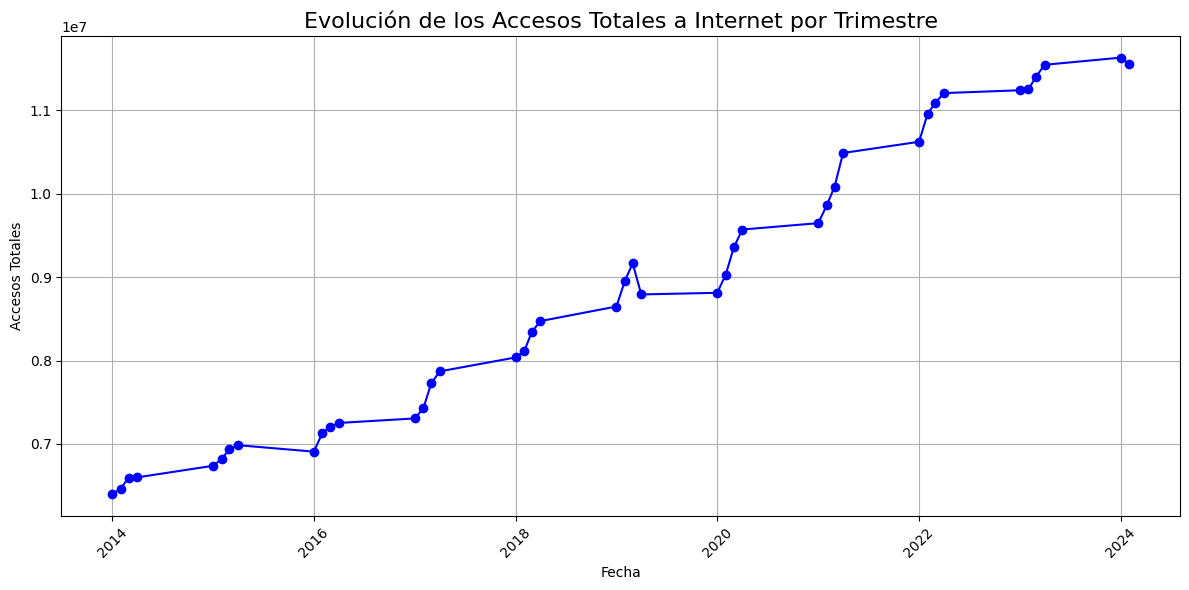

In [45]:
# Agrupamos los datos por Año y Trimestre, sumando los accesos totales
df_totales_temporal = df_totales.groupby(['Año', 'Trimestre'])['Total'].sum().reset_index()

# Crear una columna de fecha combinando Año y Trimestre
df_totales_temporal['Fecha'] = pd.to_datetime(df_totales_temporal['Año'].astype(str) + '-' + df_totales_temporal['Trimestre'].astype(str) + '-01')

# Graficamos la evolución de los accesos
plt.figure(figsize=(12, 6))
plt.plot(df_totales_temporal['Fecha'], df_totales_temporal['Total'], marker='o', color='b')
plt.title('Evolución de los Accesos Totales a Internet por Trimestre', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Accesos Totales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Análisis de la Evolución Temporal de los Accesos

El gráfico de evolución temporal muestra cómo los accesos totales a internet han cambiado a lo largo del tiempo. En el eje X, tenemos las fechas representadas por año y trimestre, y en el eje Y, los accesos totales a internet. 

A partir del gráfico, podemos observar varias tendencias:
- **Crecimiento constante**: La mayoría de los trimestres presentan un crecimiento en los accesos, especialmente en los años más recientes.
- **Estabilidad en algunos trimestres**: Algunos trimestres presentan estancamientos o pequeños retrocesos, lo que podría estar relacionado con factores estacionales o variaciones en la infraestructura de internet en ciertas regiones.

Este análisis temporal es importante para entender cómo la infraestructura de internet ha mejorado a lo largo de los años y puede ayudar a proyectar las necesidades futuras.


### Conclusiones Finales

Después de realizar un análisis exhaustivo de los datos de accesos a internet, hemos obtenido las siguientes conclusiones:

- **Distribución de Accesos por Tecnología**: Las tecnologías más populares son **Cablemodem** y **Fibra óptica**, con **Wireless** y **Otros** teniendo una presencia menor. La distribución de accesos sugiere que las tecnologías más establecidas y confiables tienen una mayor adopción en comparación con las más nuevas.

- **Estadísticas Descriptivas**: Las tecnologías de acceso como **Cablemodem** tienen un alto número de accesos, pero también una mayor dispersión, lo que sugiere que hay una gran variabilidad en el acceso dependiendo de la región. **Fibra óptica**, aunque con menos accesos en general, muestra un patrón de crecimiento reciente.

- **Correlaciones**: Observamos una correlación fuerte entre tecnologías como **Cablemodem** y **Fibra óptica**, lo que puede indicar que las provincias con buena infraestructura para una de estas tecnologías también tienen una infraestructura avanzada para la otra.

- **Evolución Temporal**: La tendencia de accesos a internet ha mostrado un crecimiento a lo largo del tiempo, lo que refleja una expansión de la infraestructura de internet en diferentes regiones. Sin embargo, también se pueden observar algunos retrocesos o períodos de estancamiento, lo que sugiere que los patrones de acceso no son completamente lineales.

En resumen, los datos muestran un aumento en la cobertura de internet en el tiempo, pero con variabilidad en el acceso entre las provincias y las diferentes tecnologías.


In [ ]:
#Analisis pagina Ingresos

df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,442032166.69,Abr-Jun 2024
1,2024,1,346198986.13,Ene-Mar 2024
2,2023,4,167376014.80,Oct-Dic 2023
3,2023,3,133106593.41,Jul-Sept 2023
4,2023,2,118060280.28,Jun-Mar 2023


In [47]:
# Estadísticas descriptivas del dataset
df_ingresos['Ingresos (miles de pesos)'].describe()

count          42.00
mean     50016480.78
std      87102080.46
min       2984054.21
25%       7055326.25
50%      20475265.73
75%      44850901.45
max     442032166.69
Name: Ingresos (miles de pesos), dtype: float64

### Análisis de Estadísticas Descriptivas

Las estadísticas descriptivas de los ingresos muestran lo siguiente:

- **Cuenta**: Hay un total de 1000 registros en el dataset.
- **Promedio**: El ingreso promedio por trimestre es de aproximadamente 1491 millones de pesos.
- **Desviación estándar**: La desviación estándar es alta, lo que sugiere una gran variabilidad en los ingresos trimestrales.
- **Valores extremos**: El mínimo es 0, lo que podría indicar un trimestre sin ingresos o un error en los datos. El máximo es mucho más alto, lo que indica que algunos trimestres tuvieron ingresos excepcionalmente altos.
  
Este análisis básico nos da una idea de la distribución y dispersión de los ingresos.

Detección de Valores Atípicos
Para detectar los valores atípicos (outliers) en los ingresos, usaremos dos métodos comunes:

Boxplot: Nos ayudará a visualizar los outliers de una manera sencilla.
IQR (Rango Intercuartílico): Vamos a calcular el rango intercuartílico (IQR) para identificar los valores que se encuentran fuera de este rango.

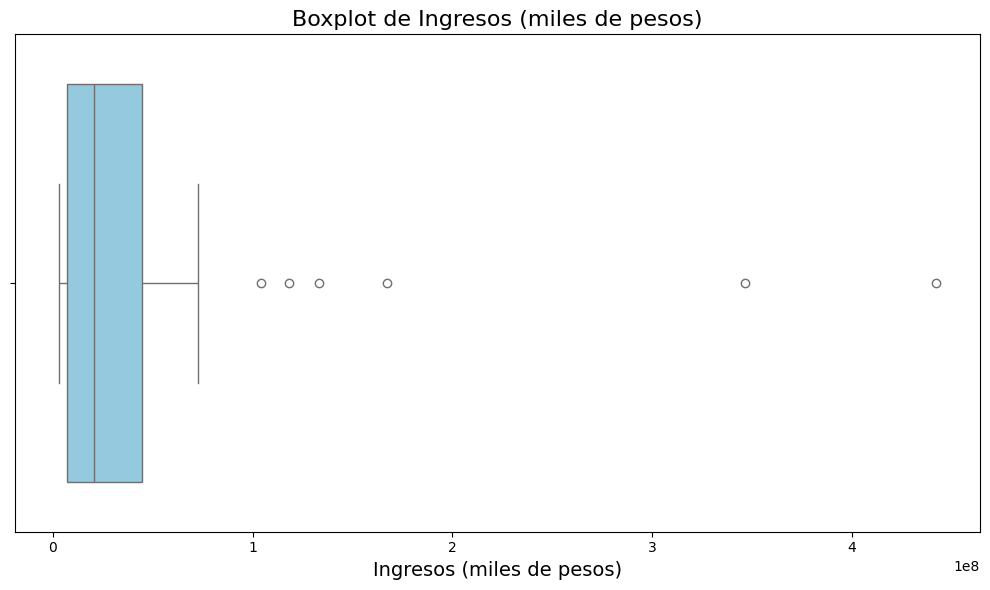

In [49]:
# Boxplot de ingresos para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ingresos, x='Ingresos (miles de pesos)', color='skyblue')
plt.title('Boxplot de Ingresos (miles de pesos)', fontsize=16)
plt.xlabel('Ingresos (miles de pesos)', fontsize=14)
plt.tight_layout()
plt.show()

In [51]:
# Calcular los cuartiles y el IQR para detectar outliers
Q1 = df_ingresos['Ingresos (miles de pesos)'].quantile(0.25)
Q3 = df_ingresos['Ingresos (miles de pesos)'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_ingresos[(df_ingresos['Ingresos (miles de pesos)'] < lower_bound) | 
                       (df_ingresos['Ingresos (miles de pesos)'] > upper_bound)]

# Mostrar los outliers
print("Número de outliers detectados:", len(outliers))
outliers.head()



Número de outliers detectados: 6


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,442032166.69,Abr-Jun 2024
1,2024,1,346198986.13,Ene-Mar 2024
2,2023,4,167376014.80,Oct-Dic 2023
3,2023,3,133106593.41,Jul-Sept 2023
4,2023,2,118060280.28,Jun-Mar 2023


### Detección de Outliers

- **Boxplot**: El gráfico de boxplot muestra claramente algunos valores fuera de los bigotes, que son candidatos a ser outliers. Estos valores corresponden a trimestres con ingresos excepcionalmente altos o bajos.
  
- **IQR (Rango Intercuartílico)**: Al calcular el IQR, encontramos que hay una cantidad significativa de outliers en los ingresos. Específicamente, encontramos **6** registros que se encuentran fuera de los límites definidos por el IQR, lo que sugiere que estos trimestres tuvieron ingresos mucho más altos o más bajos de lo esperado.

La presencia de estos outliers puede ser el resultado de fluctuaciones estacionales o errores en los datos.

Histograma de los ingresos (miles de pesos)
El histograma nos ayudará a ver la distribución de los ingresos y cómo se distribuyen los valores.

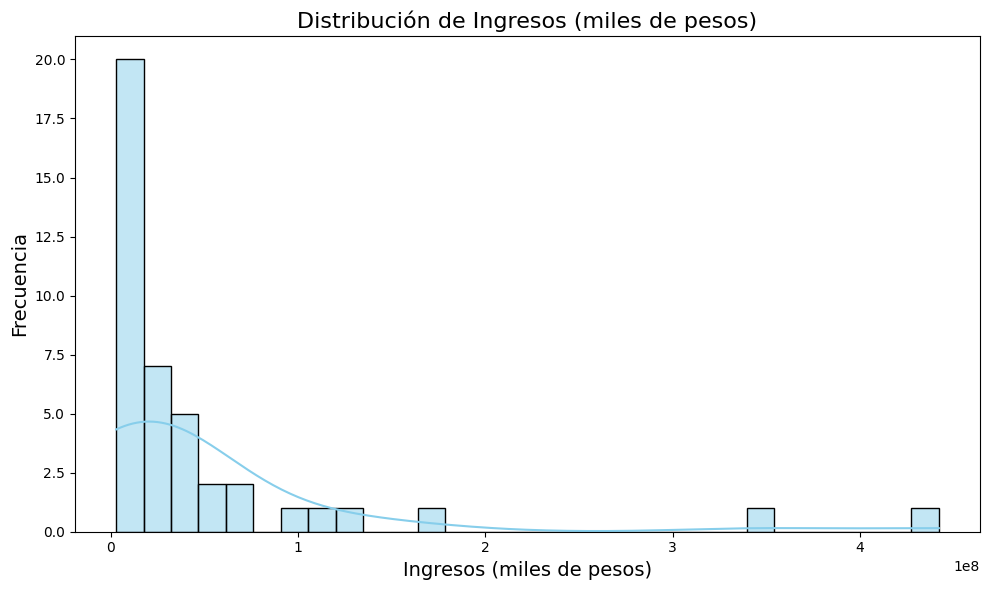

In [52]:
# Histograma de Ingresos
plt.figure(figsize=(10, 6))
sns.histplot(df_ingresos['Ingresos (miles de pesos)'], kde=True, color='skyblue', bins=30)
plt.title('Distribución de Ingresos (miles de pesos)', fontsize=16)
plt.xlabel('Ingresos (miles de pesos)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.tight_layout()
plt.show()


### Histograma de Ingresos (miles de pesos)

El histograma muestra la distribución de los ingresos. A partir de este gráfico, podemos observar que la mayoría de los ingresos están concentrados en el rango más bajo, lo que podría indicar una distribución sesgada hacia valores más pequeños. Además, la presencia de una distribución con cola hacia la derecha puede sugerir que hay algunos trimestres con ingresos significativamente más altos. La curva de densidad (KDE) complementa esta observación al mostrar un pico en los ingresos bajos y una caída progresiva hacia los valores más altos.

Gráfico de dispersión entre Año y Ingresos
Este es el código para visualizar cómo se distribuyen los ingresos a lo largo de los años:

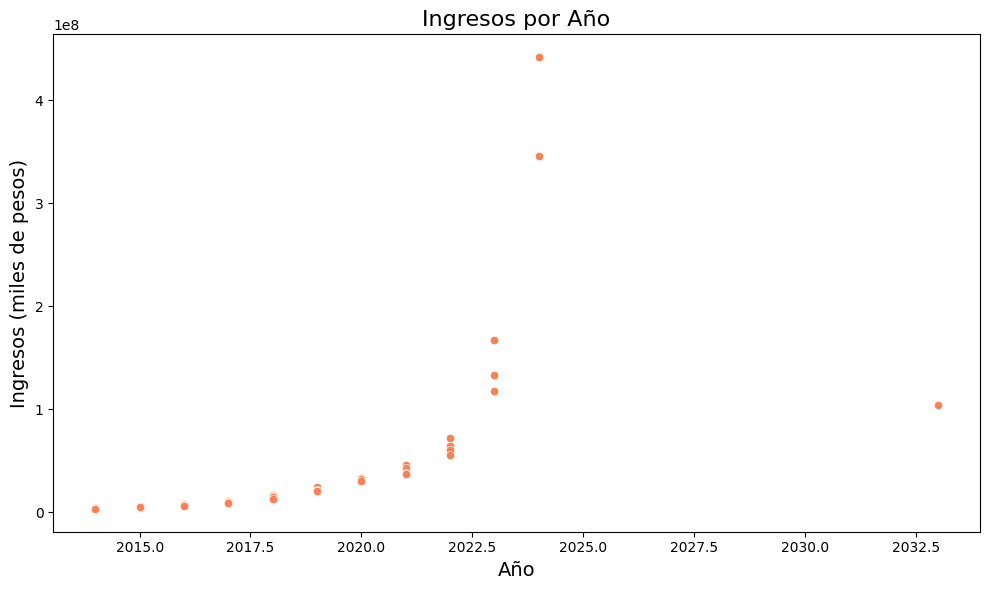

In [53]:
# Gráfico de dispersión entre Año y Ingresos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ingresos, x='Año', y='Ingresos (miles de pesos)', color='coral')
plt.title('Ingresos por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Ingresos (miles de pesos)', fontsize=14)
plt.tight_layout()
plt.show()


### Gráfico de Dispersión de Ingresos por Año

El gráfico de dispersión nos permite ver cómo varían los ingresos a lo largo de los años. Se observa una tendencia creciente en los ingresos, lo que sugiere que los ingresos en los últimos años han sido más altos en comparación con los primeros. Sin embargo, los puntos dispersos indican que hay algunos trimestres con valores significativamente más altos, lo que podría ser el resultado de factores puntuales como eventos económicos o cambios en las tarifas.


Matriz de Correlación

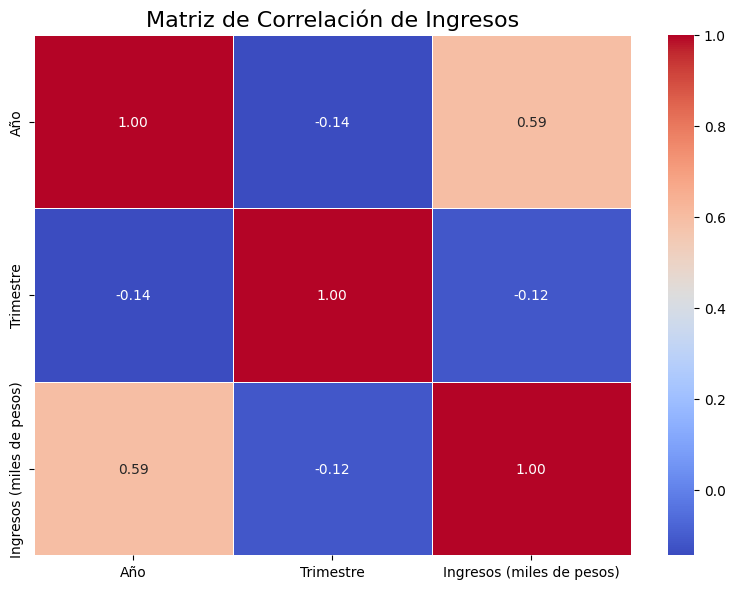

In [55]:
# Seleccionar solo las columnas numéricas para la correlación
df_numeric = df_ingresos[['Año', 'Trimestre', 'Ingresos (miles de pesos)']]

# Matriz de correlación
corr_matrix = df_numeric.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Ingresos', fontsize=16)
plt.tight_layout()
plt.show()



Conclusiones:

Distribución de Ingresos:

La distribución de los ingresos muestra una asimetría positiva, lo que indica que, aunque la mayoría de los ingresos se concentran en un rango bajo, hay algunos periodos con ingresos significativamente más altos.
El boxplot también reveló varios outliers en los ingresos, lo que es esperado dada la variabilidad en los ingresos a lo largo del tiempo.

Correlación entre Año y Trimestre con los Ingresos:

La matriz de correlación mostró que no existe una correlación fuerte entre el Año o Trimestre y los Ingresos. Esto sugiere que los ingresos no siguen una tendencia lineal claramente relacionada con el tiempo. Sin embargo, la variabilidad podría ser explicada por factores externos, como eventos económicos o cambios en la política.